In [80]:
import tensorflow as tf
import os
import shutil
import zipfile
import matplotlib.pyplot as plt
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import datetime
import numpy as np
from google.colab import files

print('versi tensorflow', tf.__version__)

versi tensorflow 2.5.0


In [2]:
# download file assets berupa zip
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O /tmp/rockpaperscissors.zip

# ekstrak data zip ke folder tmt
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# direktori awal
list_dir = os.listdir('/tmp/rockpaperscissors')
print('list directry =>', list_dir)
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

--2021-06-14 03:05:25--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.72MB/s    in 4m 8s   

2021-06-14 03:09:35 (1.24 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]

list directry => ['rps-cv-images', 'README_rpc-cv-images.txt', 'rock', 'paper', 'scissors']


In [13]:
# hitung jumlah masing-masing data pada folder gunting, kertas, batu
scissors_count = len(os.listdir(os.path.join(base_dir,'scissors')))
print('jumlah assets scissors =>', scissors_count)
paper_count = len(os.listdir(os.path.join(base_dir,'paper')))
print('jumlah assets paper =>', paper_count)
rock_count = len(os.listdir(os.path.join(base_dir,'rock')))
print('jumlah assets rock =>', rock_count)


# buat direktori train dan validation
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')
# buat folder berdasarkan direktori yang sudah dibuat
# cek jika folder sudah ada maka hapus folder lalu buat kembali
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
os.mkdir(train_dir)
if os.path.exists(validation_dir):
    shutil.rmtree(validation_dir)
os.mkdir(validation_dir)

jumlah assets scissors => 750
jumlah assets paper => 712
jumlah assets rock => 726


In [18]:
# list direktori data assets
assets_rock_dir = os.path.join(base_dir,'rock')
assets_paper_dir = os.path.join(base_dir, 'paper')
assets_scissors_dir = os.path.join(base_dir, 'scissors')


# memecah 40% data validation assets gambar rock, paper, scissors ke dalam folder train dan validation
train_rock, validation_rock = train_test_split(os.listdir(assets_rock_dir), test_size = 0.4, random_state=1)
train_paper, validation_paper = train_test_split(os.listdir(assets_paper_dir), test_size = 0.4, random_state=1)
train_scissors, validation_scissors = train_test_split(os.listdir(assets_scissors_dir), test_size = 0.4, random_state=1)


# membuat direktori rock, paper, scissors pada direktori data train
new_train_rock_dir = os.path.join(train_dir, 'rock')
new_train_paper_dir = os.path.join(train_dir, 'paper')
new_train_scissors_dir = os.path.join(train_dir, 'scissors')
# buat folder berdasarkan direktori yang sudah dibuat
if os.path.exists(new_train_rock_dir):
    shutil.rmtree(new_train_rock_dir)
os.mkdir(new_train_rock_dir)
if os.path.exists(new_train_paper_dir):
    shutil.rmtree(new_train_paper_dir)
os.mkdir(new_train_paper_dir)
if os.path.exists(new_train_scissors_dir):
    shutil.rmtree(new_train_scissors_dir)
os.mkdir(new_train_scissors_dir)
# copy image kedalam folder train
for i in train_rock:
  shutil.copyfile(os.path.join(assets_rock_dir, i), os.path.join(new_train_rock_dir, i))
for i in train_paper:
  shutil.copyfile(os.path.join(assets_paper_dir,i), os.path.join(new_train_paper_dir,i))
for i in train_scissors:
  shutil.copyfile(os.path.join(assets_scissors_dir,i), os.path.join(new_train_scissors_dir,i))


# membuat direktori rock, paper, scissors pada direktori data validation
new_validation_rock_dir = os.path.join(validation_dir, 'rock')
new_validation_paper_dir = os.path.join(validation_dir, 'paper')
new_validation_scissors_dir = os.path.join(validation_dir, 'scissors')
# buat folder berdasarkan direktori yang sudah dibuat
if os.path.exists(new_validation_rock_dir):
    shutil.rmtree(new_validation_rock_dir)
os.mkdir(new_validation_rock_dir)
if os.path.exists(new_validation_paper_dir):
    shutil.rmtree(new_validation_paper_dir)
os.mkdir(new_validation_paper_dir)
if os.path.exists(new_validation_scissors_dir):
    shutil.rmtree(new_validation_scissors_dir)
os.mkdir(new_validation_scissors_dir)
# copy image kedalam folder validation
for i in validation_rock:
  shutil.copyfile(os.path.join(assets_rock_dir, i), os.path.join(new_validation_rock_dir, i))
for i in validation_paper:
  shutil.copyfile(os.path.join(assets_paper_dir,i), os.path.join(new_validation_paper_dir,i))
for i in validation_scissors:
  shutil.copyfile(os.path.join(assets_scissors_dir,i), os.path.join(new_validation_scissors_dir,i))


print('jumlah data train rock =>', len(train_rock))
print('jumlah data train paper =>', len(train_paper))
print('jumlah data train scissors =>', len(train_scissors))
print('jumlah data validasi rock =>', len(validation_rock))
print('jumlah data validasi paper =>', len(validation_paper))
print('jumlah data validasi scissors =>', len(validation_scissors))

jumlah data train rock => 435
jumlah data train paper => 427
jumlah data train scissors => 450
jumlah data validasi rock => 291
jumlah data validasi paper => 285
jumlah data validasi scissors => 300


In [21]:
# membuat data image generator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range=0.2,
                    zoom_range=0.2,
                    validation_split=0.4,
                    fill_mode='nearest')

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range=0.2,
                    zoom_range=0.2,
                    fill_mode='nearest')

In [44]:
# training data generator
training_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

class_names = training_generator.class_indices
print('List kelas => {}'.format(class_names.keys()))

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.
List kelas => {'paper': 0, 'rock': 1, 'scissors': 2}


In [116]:
# buat model dengan sequential layer
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax') 
])

In [117]:
# compile model dengan optimizer 'RMSprop' dan loss function 'categorical_crossentropy'
model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

# tampilkan summary model
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 17, 17, 64)      

In [118]:
# proses pelatihan model
time_start = datetime.datetime.now()
fitting = model.fit(
      training_generator, # data training
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=30, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # data validasi
      validation_steps=10,  # berapa batch yang akan dieksekusi pada setiap epoch
      shuffle=True, # random acak data gambar
      verbose=1 # 1 untuk menampilkan progress, 2 untuk sembunyikan progress
)

# tampilkan waktu training model
time_end= datetime.datetime.now()
elapsed = time_end-time_start
print ('waktu training model =>', elapsed)

Epoch 1/30
25/25 [==============================] - 39s 2s/step - loss: 1.3727 - accuracy: 0.3625 - val_loss: 1.0720 - val_accuracy: 0.4812
Epoch 2/30
25/25 [==============================] - 39s 2s/step - loss: 1.0497 - accuracy: 0.4325 - val_loss: 0.9709 - val_accuracy: 0.4938
Epoch 3/30
25/25 [==============================] - 39s 2s/step - loss: 0.8662 - accuracy: 0.6162 - val_loss: 0.6736 - val_accuracy: 0.7281
Epoch 4/30
25/25 [==============================] - 38s 2s/step - loss: 0.6836 - accuracy: 0.7375 - val_loss: 0.6451 - val_accuracy: 0.7500
Epoch 5/30
25/25 [==============================] - 39s 2s/step - loss: 0.4681 - accuracy: 0.8188 - val_loss: 0.4502 - val_accuracy: 0.8594
Epoch 6/30
25/25 [==============================] - 38s 2s/step - loss: 0.4438 - accuracy: 0.8450 - val_loss: 0.4064 - val_accuracy: 0.8562
Epoch 7/30
25/25 [==============================] - 38s 2s/step - loss: 0.3599 - accuracy: 0.8587 - val_loss: 0.3733 - val_accuracy: 0.8594
Epoch 8/30
25/25 [==

In [119]:
# evaulasi akurasi dan loss validasi
(eval_loss, eval_accuracy) = model.evaluate( 
    validation_generator, batch_size=32, verbose=1)
print('accuracy => {:.2f}%'.format(eval_accuracy * 100)) 
print('loss => {:.2f}%'.format(eval_loss * 100)) 

28/28 [==============================] - 13s 467ms/step - loss: 0.1370 - accuracy: 0.9555
accuracy => 95.55%
loss => 13.70%


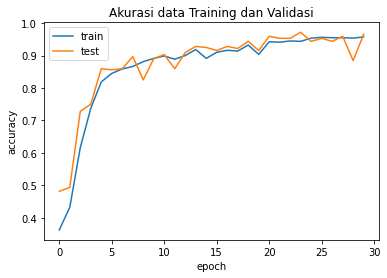

In [120]:
# history akurasi
plt.plot(fitting.history['accuracy'])
plt.plot(fitting.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.title('Akurasi data Training dan Validasi')
plt.show()

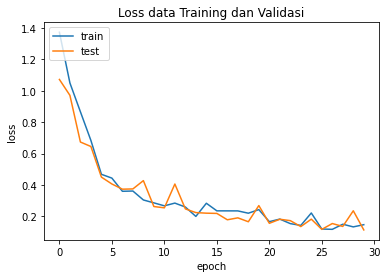

In [121]:
# history loss
plt.plot(fitting.history['loss'])
plt.plot(fitting.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.title('Loss data Training dan Validasi')
plt.show()

Saving gunting.png to gunting.png
AxesImage(54,36;334.8x217.44)
gunting.png
dict_keys(['paper', 'rock', 'scissors'])
Hasil prediksi gambar ini adalah Gunting dengan tingkat confidence 100.00%.


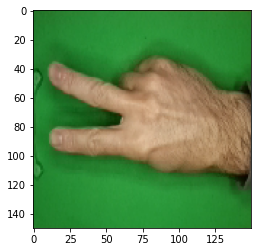

In [126]:
# upload image
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  print(imgplot)

  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.array([x])
  x = np.expand_dims(x, axis=0)
  x = x.reshape((-1,150,150,3))
 
  images = np.vstack([x])
  predictions = model.predict(images, batch_size=32)
  score = 100 * np.max(predictions)

  print(fn)
  print(training_generator.class_indices.keys())
  
  def get_class(argument):
    prediction_class = None
    if argument[0]==1:
      prediction_class = 'Kertas'
    elif argument[1]==1:
      prediction_class = 'Batu'
    elif argument[2]==1:
      prediction_class = 'Gunting'
    else:
      prediction_class = 'None'
    return prediction_class

  print(
      "Hasil prediksi gambar ini adalah {} dengan tingkat confidence {:.2f}%."
      .format(get_class(predictions[0]), score)
  )
  
  # hapus file yang sudah di upload
  os.remove(path)